# Principles of Geocomputing: Lab 4 (4 points)

This fourth lab continues building on the geospatial aspects of geospatial computing. We begin to use more geospatial modules to provide more functionality and features to solve problems.

## 0. Submission Preparation

**Please read these steps carefully, they have been updated based on feedback.**

Before submitting this lab in Canvas:
 1. Make sure that you executed all code cells, so we see the results of your code
 2. Delete this cell (0. Submission preparation)
 3. Save the Notebook (File -> Save Notebook)
 4. Download the Notebook, as a .ipynb file (File -> Download)
 5. Save this as a PDF file (File -> Save and Export Notebook as... -> PDF) 
 5. Rename the notebook **and the PDF** file using the lab file naming convention below.
 6. Upload the renamed notebook file and the PDF file to Canvas.

Lab file naming convention for your Notebook before uploading to Canvas
* __Standard__:&nbsp;&nbsp;&nbsp; <tt>&lt;InternetID&gt;_lab&lt;lab#&gt;.ipynb</tt>
* __Example__:&nbsp;&nbsp;&nbsp; <tt>thork015_lab1.ipynb</tt>

Lab file naming convention for your PDF before uploading to Canvas
* __Standard__:&nbsp;&nbsp;&nbsp; <tt>&lt;InternetID&gt;_lab&lt;lab#&gt;.pdf</tt>
* __Example__:&nbsp;&nbsp;&nbsp; <tt>thork015_lab1.pdf</tt>

The first section of each lab assignment should contain your name, Internet ID, and hours spent, declared using the variables below (<tt>**hours_spent**</tt> should be an <tt>**int**</tt> or a <tt>**float**</tt>, not a string). You may be asked to make use of these variables within the lab, so be careful not to overwrite their values further down.

For the first 3 variables below, replace the value <tt>None</tt> with an appropriate value.
  * Your name (*your_name*) should be a String
  * Your internet id (*your_intid*) should be a String
  * The number of hours spent on the lab should be an Integer or a Float. Let's say you spend 90 minutes on the lab, then feel free to say 1.5 to indicate 1 hour and 30 minutes. This helps us track how much time each student is spending on each lab so we can make adjustments for future labs or potentially review key concepts.


In the final three variables (*who_helped_you*, *who_you_helped*, and *genAI_helped_me*) you must indicate who/what helped you on this lab assignment. First, any student who helped you and which problem(s) they helped you with (*who_helped_you*). You must also indicate any student who you helped and which problems you helped them with (*who_you_helped*). This helps us avoid any problems of academic dishonesty by being honest and recognizing the hard work of our peers who are willing to help us all out. It is win-win! 

Lastly, what percentage of the assignment was written/completed with the help of generative AI (e.g., ChatGPT, Co-Pilot, etc)? Again, you must give credit where credit is due so if you used generative AI or other technologies to complete the assignment. This does not affect your grade, we are using this to understand where AI has been used in the assignment and so that you do not cross any lines with academic dishonesty, because you are acknowledging that generative AI and related technologies helped you with your work.

**Reminder** Run the code cell below by clicking on the Cell and then click on the "Run Cell" button above, which looks like a Play button.


## 1. Lab information

In [ ]:
your_name = "Ankila Kumari"
your_intid = "kuma0389"
hours_spent = 2

who_helped_you = "Used GGE for Co-ordinates and used google because I was getting this error in 2D "File "/tmp/ipykernel_165/3623463105.py", line 28
    icon=folium.Icon(color='blue', icon='info-sign')
    ^
IndentationError: unexpected indent""
who_you_helped = ", used google for this (e.g., focalmean, aspect, hillshade, etc.)"
genAI_helped_me = "%"

## 2. Basic Warm-up

### 2a. Make a map

In the code cell below, make a Folium map that is centered on Blegen Hall, West Bank, University of Minnesota. Set the zoom in the map so the outline of the building is clearly visible.

In [56]:
import folium

latitude = 44.97170
longitude = -93.2434

map_blegen = folium.Map(location=[latitude, longitude], zoom_start=77)

map_blegen


### 2b. Add a Marker

Make a new Folium map that includes a Marker centered on Blegen Hall.

In [65]:
import folium
from IPython.display import display

blegen_hall_coords = [44.97170, -93.2434]

map_blegen = folium.Map(location=blegen_hall_coords, zoom_start=77)

folium.Marker(
    location=blegen_hall_coords,
    popup='Blegen Hall',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(map_blegen)

display(map_blegen)


## 2c. Add a polygon

Make a new Folium map that includes a polygon that outlines the Social Sciences Building (next to Blegen Hall).

In [58]:
import folium
from IPython.display import display

blegen_hall_coords = [44.97170, -93.2434]

social_sciences_coords = [
    [44.9716, -93.2430],  
    [44.9713, -93.2430],  
    [44.9713, -93.2425],  
    [44.9716, -93.2425],  
    [44.9716, -93.2430]   
]


map_blegen = folium.Map(location=blegen_hall_coords, zoom_start=77)


folium.Polygon(
    locations=social_sciences_coords,
    color='black',  
    fill=True,
    fill_color='red',  
    fill_opacity=0.5,  
    popup='Social Sciences Building'
).add_to(map_blegen)


display(map_blegen)


##  2d. Combine it all

Make a new Folium map that includes both a Marker on Blegen Hall and a polygon outlining the Social Sciences Building

In [59]:
import folium
from IPython.display import display


blegen_hall_coords = [44.97170, -93.2434]


social_sciences_coords = [
    [44.9716, -93.2430],  
    [44.9713, -93.2430],  
    [44.9713, -93.2425],  
    [44.9716, -93.2425],  
    [44.9716, -93.2430]   
]


map_blegen = folium.Map(location=blegen_hall_coords, zoom_start=77)


folium.Marker(
    location=blegen_hall_coords,
    popup='Blegen Hall',
    icon=folium.Icon(color='blue', icon='info-sign')
).add_to(map_blegen)


folium.Polygon(
    locations=social_sciences_coords,
    color='black',  
    fill=True,
    fill_color='red',  
    fill_opacity=0.5,  
    popup='Social Sciences Building'
).add_to(map_blegen)

display(map_blegen)


## 3. Solving Problems
In this section, you will tackle problems to build your spatial thinking and computational thinking abilities.

### 3a. More GeoJSON vector data

Let's continue practicing with GeoJSON data. Remember that we oftentimes will convert shapefile data into GeoJSON data so that it can be analyzed and processed.

The following cities geoJSON dictionary has a collection of 6 US cities. Write a function that calculates the following information:
 - Count of the number of cities in the dataset
 - Total population of all cities
 - Total land area of all cities

In [60]:
# Here is a list of the first 6 US cities in the following dataset:
# https://raw.githubusercontent.com/jalbertbowden/us-data/master/shapefiles/us-cities/geojson/us_cities.geojson
cities = {
"type": "FeatureCollection",
"features": [
{ "type": "Feature", "properties": { "AREANAME": "Ewa Beach", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "07450", "CAPITAL": "N", "AREALAND": 1.417000, "AREAWATER": 0.449000, "POP_CL": 6, "POP2000": 14650, "WHITE": 1633, "BLACK": 96, "AMERI_ES": 16, "ASIAN": 7199, "HAWN_PI": 1556, "OTHER": 151, "MULT_RACE": 3999, "HISPANIC": 1421, "MALES": 7358, "FEMALES": 7292, "AGE_UNDER5": 1052, "AGE_5_17": 3221, "AGE_18_21": 881, "AGE_22_29": 1620, "AGE_30_39": 2122, "AGE_40_49": 1920, "AGE_50_64": 2246, "AGE_65_UP": 1588, "MED_AGE": 32.700000, "MED_AGE_M": 31.600000, "MED_AGE_F": 33.800000, "HOUSEHOLDS": 3305, "AVE_HH_SZ": 4.390000, "HSEHLD_1_M": 124, "HSEHLD_1_F": 123, "MARHH_CHD": 941, "MARHH_NO_C": 1216, "MHH_CHILD": 83, "FHH_CHILD": 227, "FAMILIES": 2941, "AVE_FAM_SZ": 4.470000, "HSE_UNITS": 3515, "VACANT": 210, "OWNER_OCC": 2278, "RENTER_OCC": 1027 }, "geometry": { "type": "Point", "coordinates": [ -7461303.702493, 4728515.729287 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Halawa", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "10000", "CAPITAL": "N", "AREALAND": 2.325000, "AREAWATER": 0.000000, "POP_CL": 6, "POP2000": 13891, "WHITE": 2153, "BLACK": 254, "AMERI_ES": 28, "ASIAN": 7070, "HAWN_PI": 1449, "OTHER": 116, "MULT_RACE": 2821, "HISPANIC": 905, "MALES": 6905, "FEMALES": 6986, "AGE_UNDER5": 779, "AGE_5_17": 2470, "AGE_18_21": 780, "AGE_22_29": 1574, "AGE_30_39": 1908, "AGE_40_49": 2080, "AGE_50_64": 2108, "AGE_65_UP": 2192, "MED_AGE": 37.400000, "MED_AGE_M": 35.800000, "MED_AGE_F": 38.800000, "HOUSEHOLDS": 4142, "AVE_HH_SZ": 3.280000, "HSEHLD_1_M": 289, "HSEHLD_1_F": 354, "MARHH_CHD": 955, "MARHH_NO_C": 1533, "MHH_CHILD": 71, "FHH_CHILD": 231, "FAMILIES": 3277, "AVE_FAM_SZ": 3.640000, "HSE_UNITS": 4289, "VACANT": 147, "OWNER_OCC": 2657, "RENTER_OCC": 1485 }, "geometry": { "type": "Point", "coordinates": [ -7439428.409338, 4728154.637490 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Hilo", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "14650", "CAPITAL": "N", "AREALAND": 54.289000, "AREAWATER": 4.147000, "POP_CL": 6, "POP2000": 40759, "WHITE": 6976, "BLACK": 183, "AMERI_ES": 137, "ASIAN": 15610, "HAWN_PI": 5348, "OTHER": 385, "MULT_RACE": 12120, "HISPANIC": 3579, "MALES": 19950, "FEMALES": 20809, "AGE_UNDER5": 2301, "AGE_5_17": 7764, "AGE_18_21": 2663, "AGE_22_29": 3722, "AGE_30_39": 4738, "AGE_40_49": 6176, "AGE_50_64": 6572, "AGE_65_UP": 6823, "MED_AGE": 38.600000, "MED_AGE_M": 37.200000, "MED_AGE_F": 39.800000, "HOUSEHOLDS": 14577, "AVE_HH_SZ": 2.700000, "HSEHLD_1_M": 1611, "HSEHLD_1_F": 1899, "MARHH_CHD": 2846, "MARHH_NO_C": 4227, "MHH_CHILD": 388, "FHH_CHILD": 1228, "FAMILIES": 10105, "AVE_FAM_SZ": 3.190000, "HSE_UNITS": 16026, "VACANT": 1449, "OWNER_OCC": 8873, "RENTER_OCC": 5704 }, "geometry": { "type": "Point", "coordinates": [ -7161818.443646, 4137136.665217 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Honolulu", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "17000", "CAPITAL": "Y", "AREALAND": 85.702000, "AREAWATER": 19.351000, "POP_CL": 8, "POP2000": 371657, "WHITE": 73093, "BLACK": 6038, "AMERI_ES": 689, "ASIAN": 207588, "HAWN_PI": 25457, "OTHER": 3318, "MULT_RACE": 55474, "HISPANIC": 16229, "MALES": 182628, "FEMALES": 189029, "AGE_UNDER5": 18896, "AGE_5_17": 52576, "AGE_18_21": 18274, "AGE_22_29": 41526, "AGE_30_39": 56230, "AGE_40_49": 55990, "AGE_50_64": 61908, "AGE_65_UP": 66257, "MED_AGE": 39.700000, "MED_AGE_M": 38.400000, "MED_AGE_F": 41.100000, "HOUSEHOLDS": 140337, "AVE_HH_SZ": 2.570000, "HSEHLD_1_M": 19657, "HSEHLD_1_F": 22032, "MARHH_CHD": 24570, "MARHH_NO_C": 39239, "MHH_CHILD": 2030, "FHH_CHILD": 6592, "FAMILIES": 87374, "AVE_FAM_SZ": 3.230000, "HSE_UNITS": 158663, "VACANT": 18326, "OWNER_OCC": 65861, "RENTER_OCC": 74476 }, "geometry": { "type": "Point", "coordinates": [ -7432121.465097, 4705302.093193 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Kahului", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "22700", "CAPITAL": "N", "AREALAND": 15.162000, "AREAWATER": 1.175000, "POP_CL": 6, "POP2000": 20146, "WHITE": 2027, "BLACK": 49, "AMERI_ES": 55, "ASIAN": 10803, "HAWN_PI": 1997, "OTHER": 296, "MULT_RACE": 4919, "HISPANIC": 1763, "MALES": 9936, "FEMALES": 10210, "AGE_UNDER5": 1438, "AGE_5_17": 3751, "AGE_18_21": 1051, "AGE_22_29": 2223, "AGE_30_39": 2833, "AGE_40_49": 2535, "AGE_50_64": 2948, "AGE_65_UP": 3367, "MED_AGE": 35.900000, "MED_AGE_M": 34.100000, "MED_AGE_F": 37.500000, "HOUSEHOLDS": 5880, "AVE_HH_SZ": 3.290000, "HSEHLD_1_M": 464, "HSEHLD_1_F": 728, "MARHH_CHD": 1371, "MARHH_NO_C": 1682, "MHH_CHILD": 185, "FHH_CHILD": 495, "FAMILIES": 4424, "AVE_FAM_SZ": 3.760000, "HSE_UNITS": 6079, "VACANT": 199, "OWNER_OCC": 3190, "RENTER_OCC": 2690 }, "geometry": { "type": "Point", "coordinates": [ -7260796.122058, 4481129.175313 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Kailua", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "23150", "CAPITAL": "N", "AREALAND": 6.644000, "AREAWATER": 2.888000, "POP_CL": 6, "POP2000": 36513, "WHITE": 16008, "BLACK": 277, "AMERI_ES": 109, "ASIAN": 7709, "HAWN_PI": 2947, "OTHER": 338, "MULT_RACE": 9125, "HISPANIC": 2228, "MALES": 18067, "FEMALES": 18446, "AGE_UNDER5": 2090, "AGE_5_17": 6724, "AGE_18_21": 1524, "AGE_22_29": 3130, "AGE_30_39": 5322, "AGE_40_49": 6214, "AGE_50_64": 6499, "AGE_65_UP": 5010, "MED_AGE": 39.100000, "MED_AGE_M": 38.000000, "MED_AGE_F": 40.200000, "HOUSEHOLDS": 12229, "AVE_HH_SZ": 2.980000, "HSEHLD_1_M": 897, "HSEHLD_1_F": 1130, "MARHH_CHD": 3056, "MARHH_NO_C": 4188, "MHH_CHILD": 256, "FHH_CHILD": 613, "FAMILIES": 9324, "AVE_FAM_SZ": 3.330000, "HSE_UNITS": 12780, "VACANT": 551, "OWNER_OCC": 8521, "RENTER_OCC": 3708 }, "geometry": { "type": "Point", "coordinates": [ -7407068.350175, 4710303.343603 ] } }
]}

def cities_information(geojson):
    total_population = 0
    total_land_area = 0

    num_cities = len(geojson['features'])

    for city in geojson['features']:
        total_population += city['properties']['POP2000']
        total_land_area += city['properties']['AREALAND']

    print(f"Number of cities: {num_cities}")
    print(f"Total population of all cities: {total_population}")
    print(f"Total land area of all cities: {total_land_area} square miles")

cities_information(cities)



Number of cities: 6
Total population of all cities: 497616
Total land area of all cities: 165.53900000000002 square miles


### 3b. More Vector!

Let's make it more interesting. Using the same cities dataset write a new function that calculates the following:
 - Average population of all cities
 - Mean center of all the city locations (now we get to use the spatial information)
 
The mean center is the central point for a set of features (points in our case). For more information check out the following webpage: http://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-statistics-toolbox/mean-center.htm 

Important note: To get averages you must use the information you already calculated from the previous question (totals and counts). Then it becomes an easy(ish) task.


In [61]:
# Here is a list of the first 6 US cities in the following dataset:
# https://raw.githubusercontent.com/jalbertbowden/us-data/master/shapefiles/us-cities/geojson/us_cities.geojson
cities = {
"type": "FeatureCollection",
"features": [
{ "type": "Feature", "properties": { "AREANAME": "Ewa Beach", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "07450", "CAPITAL": "N", "AREALAND": 1.417000, "AREAWATER": 0.449000, "POP_CL": 6, "POP2000": 14650, "WHITE": 1633, "BLACK": 96, "AMERI_ES": 16, "ASIAN": 7199, "HAWN_PI": 1556, "OTHER": 151, "MULT_RACE": 3999, "HISPANIC": 1421, "MALES": 7358, "FEMALES": 7292, "AGE_UNDER5": 1052, "AGE_5_17": 3221, "AGE_18_21": 881, "AGE_22_29": 1620, "AGE_30_39": 2122, "AGE_40_49": 1920, "AGE_50_64": 2246, "AGE_65_UP": 1588, "MED_AGE": 32.700000, "MED_AGE_M": 31.600000, "MED_AGE_F": 33.800000, "HOUSEHOLDS": 3305, "AVE_HH_SZ": 4.390000, "HSEHLD_1_M": 124, "HSEHLD_1_F": 123, "MARHH_CHD": 941, "MARHH_NO_C": 1216, "MHH_CHILD": 83, "FHH_CHILD": 227, "FAMILIES": 2941, "AVE_FAM_SZ": 4.470000, "HSE_UNITS": 3515, "VACANT": 210, "OWNER_OCC": 2278, "RENTER_OCC": 1027 }, "geometry": { "type": "Point", "coordinates": [ -7461303.702493, 4728515.729287 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Halawa", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "10000", "CAPITAL": "N", "AREALAND": 2.325000, "AREAWATER": 0.000000, "POP_CL": 6, "POP2000": 13891, "WHITE": 2153, "BLACK": 254, "AMERI_ES": 28, "ASIAN": 7070, "HAWN_PI": 1449, "OTHER": 116, "MULT_RACE": 2821, "HISPANIC": 905, "MALES": 6905, "FEMALES": 6986, "AGE_UNDER5": 779, "AGE_5_17": 2470, "AGE_18_21": 780, "AGE_22_29": 1574, "AGE_30_39": 1908, "AGE_40_49": 2080, "AGE_50_64": 2108, "AGE_65_UP": 2192, "MED_AGE": 37.400000, "MED_AGE_M": 35.800000, "MED_AGE_F": 38.800000, "HOUSEHOLDS": 4142, "AVE_HH_SZ": 3.280000, "HSEHLD_1_M": 289, "HSEHLD_1_F": 354, "MARHH_CHD": 955, "MARHH_NO_C": 1533, "MHH_CHILD": 71, "FHH_CHILD": 231, "FAMILIES": 3277, "AVE_FAM_SZ": 3.640000, "HSE_UNITS": 4289, "VACANT": 147, "OWNER_OCC": 2657, "RENTER_OCC": 1485 }, "geometry": { "type": "Point", "coordinates": [ -7439428.409338, 4728154.637490 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Hilo", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "14650", "CAPITAL": "N", "AREALAND": 54.289000, "AREAWATER": 4.147000, "POP_CL": 6, "POP2000": 40759, "WHITE": 6976, "BLACK": 183, "AMERI_ES": 137, "ASIAN": 15610, "HAWN_PI": 5348, "OTHER": 385, "MULT_RACE": 12120, "HISPANIC": 3579, "MALES": 19950, "FEMALES": 20809, "AGE_UNDER5": 2301, "AGE_5_17": 7764, "AGE_18_21": 2663, "AGE_22_29": 3722, "AGE_30_39": 4738, "AGE_40_49": 6176, "AGE_50_64": 6572, "AGE_65_UP": 6823, "MED_AGE": 38.600000, "MED_AGE_M": 37.200000, "MED_AGE_F": 39.800000, "HOUSEHOLDS": 14577, "AVE_HH_SZ": 2.700000, "HSEHLD_1_M": 1611, "HSEHLD_1_F": 1899, "MARHH_CHD": 2846, "MARHH_NO_C": 4227, "MHH_CHILD": 388, "FHH_CHILD": 1228, "FAMILIES": 10105, "AVE_FAM_SZ": 3.190000, "HSE_UNITS": 16026, "VACANT": 1449, "OWNER_OCC": 8873, "RENTER_OCC": 5704 }, "geometry": { "type": "Point", "coordinates": [ -7161818.443646, 4137136.665217 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Honolulu", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "17000", "CAPITAL": "Y", "AREALAND": 85.702000, "AREAWATER": 19.351000, "POP_CL": 8, "POP2000": 371657, "WHITE": 73093, "BLACK": 6038, "AMERI_ES": 689, "ASIAN": 207588, "HAWN_PI": 25457, "OTHER": 3318, "MULT_RACE": 55474, "HISPANIC": 16229, "MALES": 182628, "FEMALES": 189029, "AGE_UNDER5": 18896, "AGE_5_17": 52576, "AGE_18_21": 18274, "AGE_22_29": 41526, "AGE_30_39": 56230, "AGE_40_49": 55990, "AGE_50_64": 61908, "AGE_65_UP": 66257, "MED_AGE": 39.700000, "MED_AGE_M": 38.400000, "MED_AGE_F": 41.100000, "HOUSEHOLDS": 140337, "AVE_HH_SZ": 2.570000, "HSEHLD_1_M": 19657, "HSEHLD_1_F": 22032, "MARHH_CHD": 24570, "MARHH_NO_C": 39239, "MHH_CHILD": 2030, "FHH_CHILD": 6592, "FAMILIES": 87374, "AVE_FAM_SZ": 3.230000, "HSE_UNITS": 158663, "VACANT": 18326, "OWNER_OCC": 65861, "RENTER_OCC": 74476 }, "geometry": { "type": "Point", "coordinates": [ -7432121.465097, 4705302.093193 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Kahului", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "22700", "CAPITAL": "N", "AREALAND": 15.162000, "AREAWATER": 1.175000, "POP_CL": 6, "POP2000": 20146, "WHITE": 2027, "BLACK": 49, "AMERI_ES": 55, "ASIAN": 10803, "HAWN_PI": 1997, "OTHER": 296, "MULT_RACE": 4919, "HISPANIC": 1763, "MALES": 9936, "FEMALES": 10210, "AGE_UNDER5": 1438, "AGE_5_17": 3751, "AGE_18_21": 1051, "AGE_22_29": 2223, "AGE_30_39": 2833, "AGE_40_49": 2535, "AGE_50_64": 2948, "AGE_65_UP": 3367, "MED_AGE": 35.900000, "MED_AGE_M": 34.100000, "MED_AGE_F": 37.500000, "HOUSEHOLDS": 5880, "AVE_HH_SZ": 3.290000, "HSEHLD_1_M": 464, "HSEHLD_1_F": 728, "MARHH_CHD": 1371, "MARHH_NO_C": 1682, "MHH_CHILD": 185, "FHH_CHILD": 495, "FAMILIES": 4424, "AVE_FAM_SZ": 3.760000, "HSE_UNITS": 6079, "VACANT": 199, "OWNER_OCC": 3190, "RENTER_OCC": 2690 }, "geometry": { "type": "Point", "coordinates": [ -7260796.122058, 4481129.175313 ] } }
,
{ "type": "Feature", "properties": { "AREANAME": "Kailua", "CLASS": "CDP", "ST": "HI", "STFIPS": "15", "PLACEFIP": "23150", "CAPITAL": "N", "AREALAND": 6.644000, "AREAWATER": 2.888000, "POP_CL": 6, "POP2000": 36513, "WHITE": 16008, "BLACK": 277, "AMERI_ES": 109, "ASIAN": 7709, "HAWN_PI": 2947, "OTHER": 338, "MULT_RACE": 9125, "HISPANIC": 2228, "MALES": 18067, "FEMALES": 18446, "AGE_UNDER5": 2090, "AGE_5_17": 6724, "AGE_18_21": 1524, "AGE_22_29": 3130, "AGE_30_39": 5322, "AGE_40_49": 6214, "AGE_50_64": 6499, "AGE_65_UP": 5010, "MED_AGE": 39.100000, "MED_AGE_M": 38.000000, "MED_AGE_F": 40.200000, "HOUSEHOLDS": 12229, "AVE_HH_SZ": 2.980000, "HSEHLD_1_M": 897, "HSEHLD_1_F": 1130, "MARHH_CHD": 3056, "MARHH_NO_C": 4188, "MHH_CHILD": 256, "FHH_CHILD": 613, "FAMILIES": 9324, "AVE_FAM_SZ": 3.330000, "HSE_UNITS": 12780, "VACANT": 551, "OWNER_OCC": 8521, "RENTER_OCC": 3708 }, "geometry": { "type": "Point", "coordinates": [ -7407068.350175, 4710303.343603 ] } }
]}

def cities_average_information(geojson):
    total_population = 0
    total_latitude = 0
    total_longitude = 0
    city_count = len(geojson['features'])

    for city in geojson['features']:
        population = city['properties']['POP2000']
        longitude, latitude = city['geometry']['coordinates']

        total_population += population
        total_longitude += longitude
        total_latitude += latitude

    average_population = total_population / city_count

    mean_center_longitude = total_longitude / city_count
    mean_center_latitude = total_latitude / city_count

    print(f"Average Population of all cities: {average_population:.2f}")
    print(f"Mean Center (Longitude, Latitude): ({mean_center_longitude:.6f}, {mean_center_latitude:.6f})")

cities_average_information(cities)


Average Population of all cities: 82936.00
Mean Center (Longitude, Latitude): (-7360422.748801, 4581756.940684)


## 4. Reps (Repetitive actions to build your comfort levels)

This series of exercises is designed to build your comfort writing Python code.

### Reps for Passing data structures into functions, calculating values, and returning something useful.

#### 4a. Max
Write a function named `find_max` that accepts either a list of numbers or a dictionary with numeric values. The function should iterate through the input and return the maximum value found. If the input is a dictionary, consider only the values, not the keys.

In [36]:
def find_max(data):
    if isinstance(data, list):
        return max(data)
    elif isinstance(data, dict):
        return max(data.values())



# Do not modify below, these two function calls should work properly!

# For a list
print(find_max([1, 3, 5, 7, 9]))  # Output: 9

# For a dictionary
print(find_max({'a': 2, 'b': 4, 'c': 6, 'd': 8}))  # Output: 8

9
8


#### 4b. Sum
Develop a function called `calculate_sum` that takes a list of numbers or a dictionary with numeric values as input. The function should loop over the elements and return the sum of all numbers. For dictionaries, sum up the values, not the keys.


In [37]:
def calculate_sum(data):
    if isinstance(data, list):
        return sum(data)
    
    elif isinstance(data, dict):
        return sum(data.values())


# Do not modify below, these two function calls should work properly!

# For a list
print(calculate_sum([1, 2, 3, 4, 5]))  # Output: 15

# For a dictionary
print(calculate_sum({'x': 10, 'y': 20, 'z': 30}))  # Output: 60


15
60


Use a conditional(s) to check whether variable **z** is greater than variable **y** and that **z** is smaller than the number **10**. Print the results.

In [62]:
z = 5 
y = 2 

if z > y and z < 10:
    print("z is greater than variable y and that z is smaller than the number 10.")
else:
    print("Condition not met.")


z is greater than variable y and that z is smaller than the number 10.


Add variable **x** and **y** together and use a conditional to compare it to variable **z**. Print the results which include (in plain text) which condition you are using to compare the sum of x and y to the variable z.

In [63]:
x = 4  
y = 2 
z = 7  

sum_xy = x + y

if sum_xy > z:
    print(f"The sum of x and y ({sum_xy}) is greater than z ({z}).")
elif sum_xy < z:
    print(f"The sum of x and y ({sum_xy}) is smaller than z ({z}).")
else:
    print(f"The sum of x and y ({sum_xy}) is equal to z ({z}).")


The sum of x and y (6) is smaller than z (7).


## 5. Stretch Exercise. Keep moving forward by solving this problem.

### Show me something that is (in raster)!

This is an open-ended question that has 3 components
 1. Open the raster dataset provided in class
 2. Write a **focal** raster operation (e.g., focalmean, aspect, hillshade, etc.)
 3. Plot the resulting output.

Output raster is [[-1, 1, -1, 1], [-1, 1, -1, 1], [-3, -1, -3, -1], [1, 3, 1, 3]]


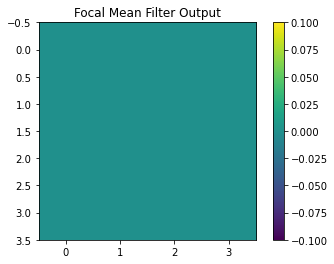

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

my_raster_1 = [
    [1, 2, 1, 2],
    [3, 4, 3, 4],
    [1, 2, 1, 2],
    [3, 4, 3, 4]
]

my_raster_2 = [
    [2, 1, 2, 1],
    [4, 3, 4, 3],
    [4, 3, 4, 3],
    [2, 1, 2, 1]
]

def raster_calculator(raster1, raster2, operation_string):
    output_raster = [[0 for _ in row] for row in raster1]

    for i in range(len(raster1)):
        for j in range(len(raster1[i])):
            if operation_string == "+":
                output_raster[i][j] = raster1[i][j] + raster2[i][j]
            elif operation_string == "-":
                output_raster[i][j] = raster1[i][j] - raster2[i][j]

    return output_raster


operation = "-" 
output_raster = raster_calculator(my_raster_1, my_raster_2, operation)

print("Output raster is", output_raster)

focal_mean = uniform_filter(output_raster, size=3) 

plt.imshow(focal_mean, cmap='viridis') 
plt.colorbar() 
plt.title('Focal Mean Filter Output')
plt.show()


## 6. Checking in

In the Markdown cell below tell us how you think you are doing on a scale of 1-5 (1 is struggling, 5 is rocking it). Then complete the following 2 sentences.

### How are you doing?

On a scale of 1-5 I am 4
I gave myself that rating because I feel confident in completing basic exercises and working with simple Python functions but still need practice with more complex geospatial operations and raster handling.


I could use the most help understanding ..."I could use the most help understanding how to apply advanced raster operations like focal statistics and aspect, as well as working with large geospatial datasets effectively."


I have a really good understanding of ..."I have a really good understanding of writing Python functions, performing simple raster operations, and plotting data with libraries like matplotlib."